# Predicción de la absorción de carbono en el océano

información del dataset: https://cdiac.ess-dive.lbl.gov/ftp/oceans/GLODAPv2/Data_Products/

## Exploratory Data Analysis 

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('./data/GLODAPv2 Merged Master File.csv')

In [45]:
df.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        cruise  station  cast  year  month  day  hour  minute  latitude  \
0           7      970     1  1992     11   21     0       0  -48.0058   
1           7      973     1  1992     11   23     0       0  -49.0092   
2           7      975     1  1992     11   23     0       0  -49.5000   
3           7      879     3  1992     10   18     0       0  -48.0133   
4           7      964     1  1992     11   20     0       0  -48.0108   
...       ...      ...   ...   ...    ...  ...   ...     ...       ...   
15255     719       26     1  2006      3   21     0       0   35.8600   
15256     719       23     1  2006      3   21     0       0   35.9130   
15257     719       38     1  2007      5    8     0       0   35.9850   
15258     719       27     1  2006      3   21     0       0   35.9110   
15259     719       22     1  2006      3   21     0       0   35.8920   

       longitude  ...     toc  tocf     doc  docf

In [38]:
df.info

<bound method DataFrame.info of        cruise  station  cast  year  month  day  hour  minute  latitude  \
0           7      970     1  1992     11   21     0       0  -48.0058   
1           7      973     1  1992     11   23     0       0  -49.0092   
2           7      975     1  1992     11   23     0       0  -49.5000   
3           7      879     3  1992     10   18     0       0  -48.0133   
4           7      964     1  1992     11   20     0       0  -48.0108   
...       ...      ...   ...   ...    ...  ...   ...     ...       ...   
15255     719       26     1  2006      3   21     0       0   35.8600   
15256     719       23     1  2006      3   21     0       0   35.9130   
15257     719       38     1  2007      5    8     0       0   35.9850   
15258     719       27     1  2006      3   21     0       0   35.9110   
15259     719       22     1  2006      3   21     0       0   35.8920   

       longitude  ...     toc  tocf     doc  docf     don  donf     tdn  tdnf  

In [5]:
df.columns

Index(['cruise', 'station', 'cast', 'year', 'month', 'day', 'hour', 'minute',
       'latitude', 'longitude',
       ...
       'toc', 'tocf', 'doc', 'docf', 'don', 'donf', 'tdn', 'tdnf', 'chla',
       'chlaf'],
      dtype='object', length=101)

In [6]:
df.describe()

,cruise,station,cast,year,month,day,hour,minute,latitude,longitude,...,toc,tocf,doc,docf,don,donf,tdn,tdnf,chla,chlaf
count,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,...,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000
mean,347.919987,894.160550,4.064220,2001.671232,6.132831,15.874705,6.403932,16.270249,12.598935,-9.023130,...,-9906.619470,8.935780,-9086.577974,8.364220,-9957.042363,8.970642,-9538.848864,8.678899,-9672.018820,8.771101
std,190.853005,4303.049388,23.318664,5.990816,3.166003,8.897353,7.692873,19.542834,44.609750,99.627372,...,960.088711,0.667418,2886.886196,2.011593,646.546733,0.452389,2098.681720,1.464493,1778.462076,1.244990
min,7.000000,0.000000,0.000000,1990.000000,1.000000,1.000000,0.000000,0.000000,-77.960600,-179.829000,...,-9999.000000,2.000000,-9999.000000,2.000000,-9999.000000,2.000000,-9999.000000,2.000000,-9999.000000,2.000000
25%,247.000000,31.000000,1.000000,1996.000000,3.000000,8.000000,0.000000,0.000000,-28.056325,-76.202200,...,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000
50%,314.000000,74.000000,1.000000,2002.000000,6.000000,16.000000,2.000000,5.000000,17.937450,-16.669100,...,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000
75%,487.000000,174.250000,1.000000,2007.000000,9.000000,24.000000,13.000000,32.000000,52.733100,61.195500,...,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000
max,719.000000,84987.000000,421.000000,2013.000000,12.000000,31.000000,23.000000,81.000000,90.000000,180.000000,...,314.000000,9.000000,198.200000,9.000000,16.760000,9.000000,49.170000,9.000000,15.830000,9.000000


In [39]:
df = df.replace(-9999, np.nan)
df = df.fillna(df.mean())

In [40]:
df

,cruise,station,cast,year,month,day,hour,minute,latitude,longitude,...,toc,tocf,doc,docf,don,donf,tdn,tdnf,chla,chlaf
0,7,970,1,1992,11,21,0,0,-48.0058,-6.00250,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
1,7,973,1,1992,11,23,0,0,-49.0092,-5.99083,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
2,7,975,1,1992,11,23,0,0,-49.5000,-6.00250,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
3,7,879,3,1992,10,18,0,0,-48.0133,-5.99833,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
4,7,964,1,1992,11,20,0,0,-48.0108,-6.00500,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15255,719,26,1,2006,3,21,0,0,35.8600,-5.97800,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
15256,719,23,1,2006,3,21,0,0,35.9130,-5.74300,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
15257,719,38,1,2007,5,8,0,0,35.9850,-5.36300,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
15258,719,27,1,2006,3,21,0,0,35.9110,-5.74700,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9


## Feature Engineering

['Temperature (°C)', 'Salinity (PSU)', 'Dissolved Oxygen (umol/kg)', 
                 'Apparent Oxygen Utilization (umol/kg)', 'Nitrate (umol/kg)', 
                 'Phosphate (umol/kg)', 'Silicate (umol/kg)', 'pH', 'Total Alkalinity (umol/kg)', 
                 'Total Carbon Dioxide (umol/kg)', 'Partial Pressure of CO2 (uatm)', 
                 'Carbon-13/Carbon-12 ratio (d13C) (per mil)', 'Nitrogen-15/Nitrogen-14 ratio (d15N) (per mil)', 
                 'Oxygen-18/Oxygen-16 ratio (d18O) (per mil)']

In [10]:
df.columns

Index(['cruise', 'station', 'cast', 'year', 'month', 'day', 'hour', 'minute',
       'latitude', 'longitude',
       ...
       'toc', 'tocf', 'doc', 'docf', 'don', 'donf', 'tdn', 'tdnf', 'chla',
       'chlaf'],
      dtype='object', length=101)

/home/arrate/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_11313/3186499485.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_data['cluster'] = kmeans.labels_


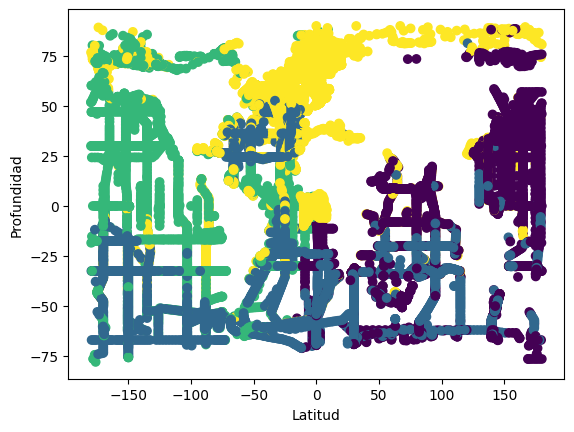

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# seleccionar las mediciones de temperatura del agua
temperature_data = df[['latitude', 'longitude', 'depth', 'phts25p0']]

# normalizar los datos
temperature_data_norm = (temperature_data - temperature_data.mean()) / temperature_data.std()

# aplicar el algoritmo de clustering k-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(temperature_data_norm)

# agregar las etiquetas de cluster a los datos originales
temperature_data['cluster'] = kmeans.labels_

# graficar los resultados
plt.scatter(temperature_data['longitude'], temperature_data['latitude'], c=temperature_data['cluster'])
plt.xlabel('Latitud')
plt.ylabel('Profundidad')
plt.show()


## Modelado

/home/arrate/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/arrate/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/arrate/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/arrate/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/arrate/.local/lib/python3.

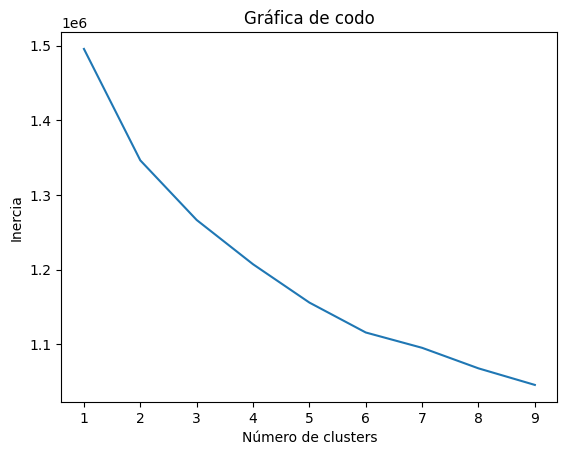

/home/arrate/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inercia: 1207313.8324093784


KeyError: 'region'

In [26]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Preprocesar datos
X = df.drop(['longitude', 'latitude', 'depth'], axis=1) 
X = StandardScaler().fit_transform(X) # Escalar datos

# Selección del número de clusters
inercias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inercias)
plt.title('Gráfica de codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

# Ejecución del algoritmo K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Evaluación del modelo
print('Inercia:', kmeans.inertia_)
print('Homogeneidad:', metrics.homogeneity_score(df['region'], kmeans.labels_))

# Visualización de los clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.title('Clusters de datos de Glodapv2 ocean data')
plt.show()


/home/arrate/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_11313/1211371243.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_salinity_data['cluster'] = kmeans.labels_


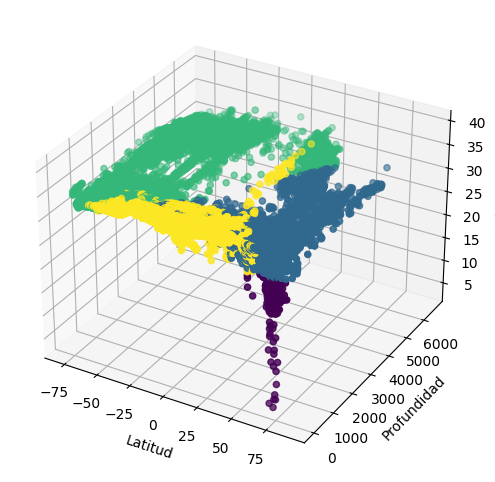

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# seleccionar las mediciones de temperatura y salinidad del agua
temperature_salinity_data = df[['latitude', 'longitude', 'depth', 'temperature', 'salinity']]

# normalizar los datos
temperature_salinity_data_norm = (temperature_salinity_data - temperature_salinity_data.mean()) / temperature_salinity_data.std()

# aplicar el algoritmo de clustering k-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(temperature_salinity_data_norm)

# agregar las etiquetas de cluster a los datos originales
temperature_salinity_data['cluster'] = kmeans.labels_

# graficar los resultados
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(temperature_salinity_data['latitude'], temperature_salinity_data['depth'], temperature_salinity_data['salinity'], c=temperature_salinity_data['cluster'])
ax.set_xlabel('Latitud')
ax.set_ylabel('Profundidad')
ax.set_zlabel('Salinidad')
plt.show()


/home/arrate/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_11313/2157129918.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocean_data['cluster'] = kmeans.labels_


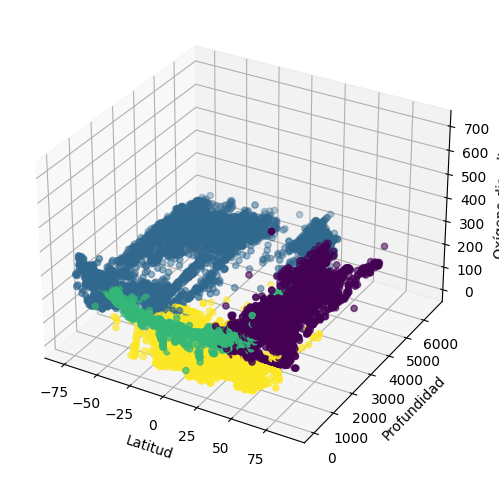

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# seleccionar las mediciones de temperatura, salinidad, oxígeno disuelto y pH del agua
ocean_data = df[['latitude', 'longitude', 'depth', 'temperature', 'salinity', 'oxygen', 'phts25p0']]

# normalizar los datos
ocean_data_norm = (ocean_data - ocean_data.mean()) / ocean_data.std()

# aplicar el algoritmo de clustering k-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(ocean_data_norm)

# agregar las etiquetas de cluster a los datos originales
ocean_data['cluster'] = kmeans.labels_

# graficar los resultados
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ocean_data['latitude'], ocean_data['depth'], ocean_data['oxygen'], c=ocean_data['cluster'])
ax.set_xlabel('Latitud')
ax.set_ylabel('Profundidad')
ax.set_zlabel('Oxígeno disuelto')
plt.show()


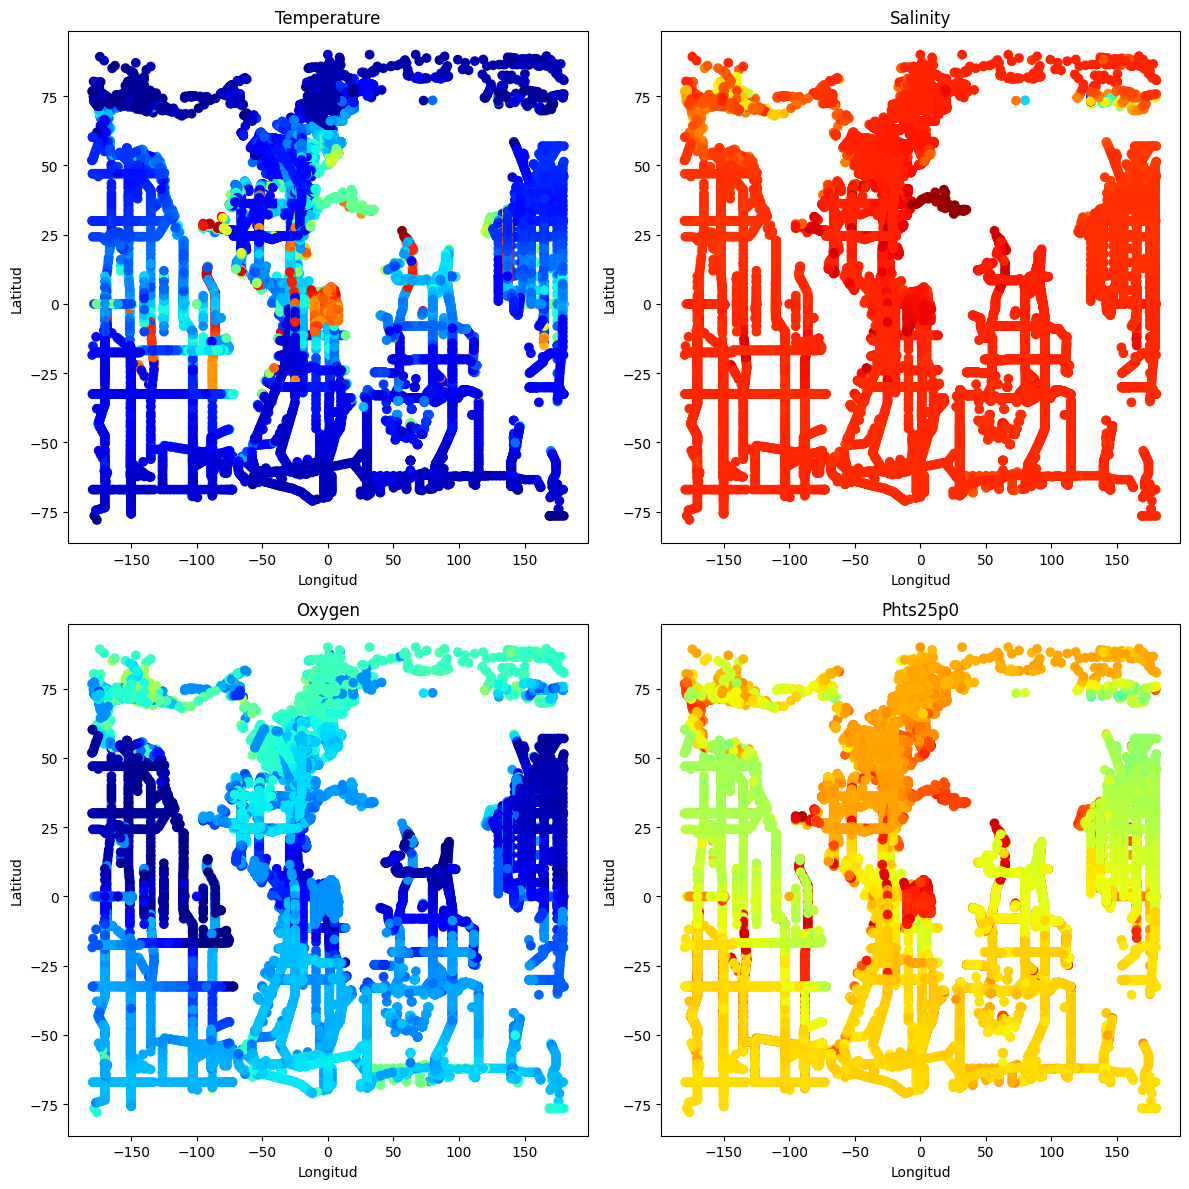

In [18]:
import pandas as pd
import matplotlib.pyplot as plt



# seleccionar las mediciones de temperatura, salinidad, oxígeno disuelto y pH del agua
ocean_data = df[['latitude', 'longitude', 'temperature', 'salinity', 'oxygen', 'phts25p0']]

# graficar los resultados
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
variables = ['temperature', 'salinity', 'oxygen', 'phts25p0']
for i, var in enumerate(variables):
    axs[i].scatter(ocean_data['longitude'], ocean_data['latitude'], c=ocean_data[var], cmap='jet')
    axs[i].set_xlabel('Longitud')
    axs[i].set_ylabel('Latitud')
    axs[i].set_title(var.capitalize())
plt.tight_layout()
plt.show()


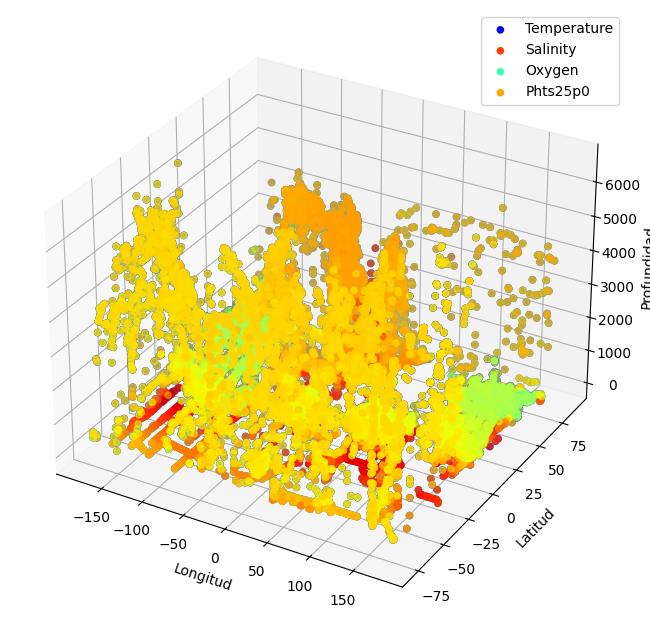

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# seleccionar las mediciones de temperatura, salinidad, oxígeno disuelto, pH y profundidad del agua
ocean_data = df[['latitude', 'longitude', 'depth', 'temperature', 'salinity', 'oxygen', 'phts25p0']]

# graficar los resultados
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
variables = ['temperature', 'salinity', 'oxygen', 'phts25p0']
for var in variables:
    ax.scatter(ocean_data['longitude'], ocean_data['latitude'], ocean_data['depth'], c=ocean_data[var], cmap='jet', label=var.capitalize())
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Profundidad')
ax.legend()
plt.show()


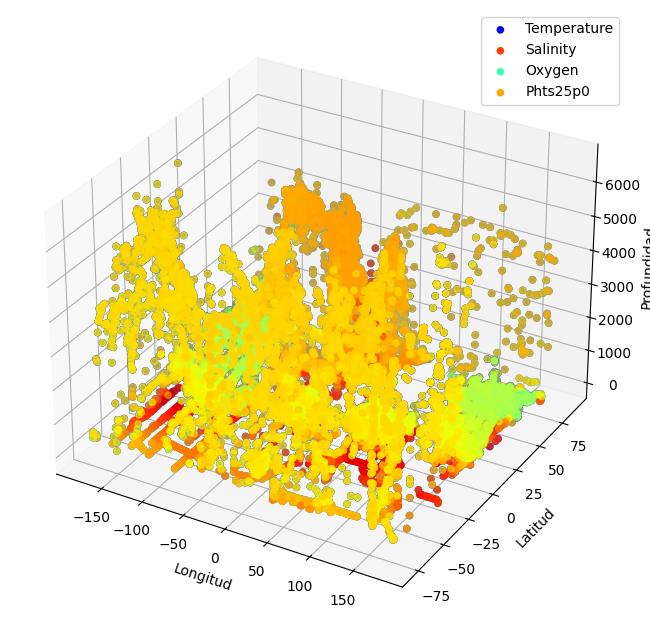

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# seleccionar las mediciones de temperatura, salinidad, oxígeno disuelto, phts25p0 y profundidad del agua
ocean_data = df[['latitude', 'longitude', 'depth', 'temperature', 'salinity', 'oxygen', 'phts25p0']]

# graficar los resultados
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
variables = ['temperature', 'salinity', 'oxygen', 'phts25p0']
for var in variables:
    ax.scatter(ocean_data['longitude'], ocean_data['latitude'], ocean_data['depth'], c=ocean_data[var], cmap='jet', label=var.capitalize())
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Profundidad')
ax.legend()
plt.show()


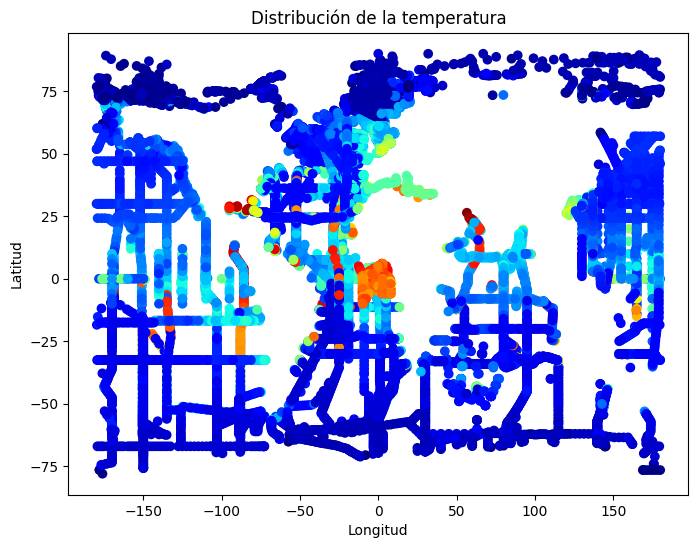

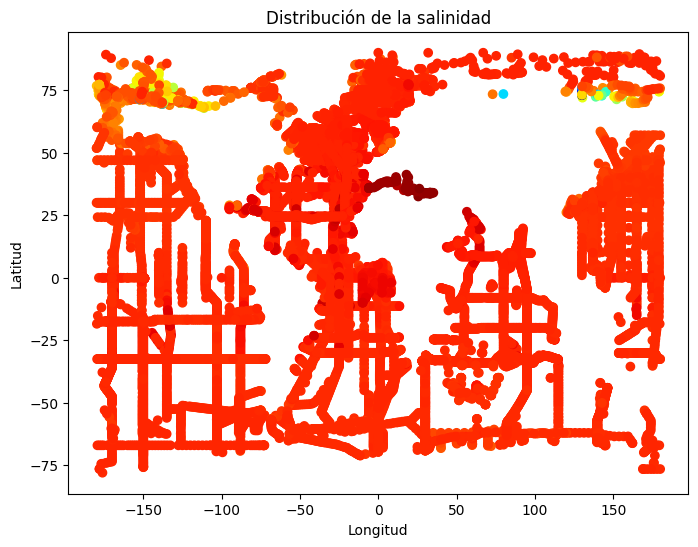

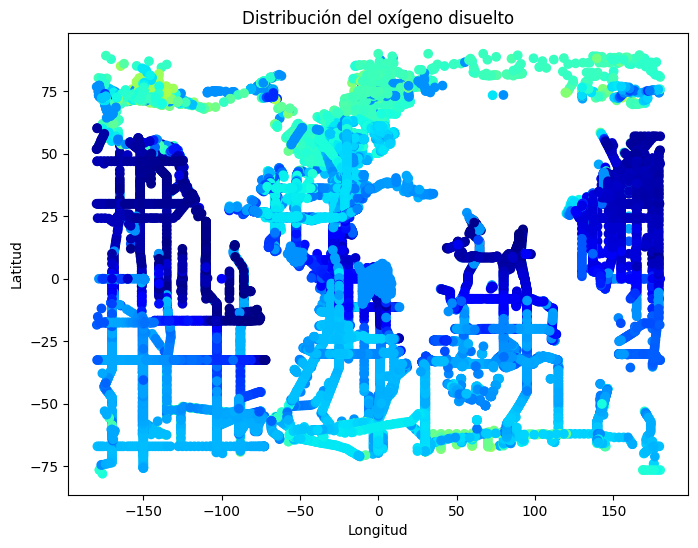

TypeError: cannot unpack non-iterable module object

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
# graficar la distribución de la variable 'temperature' en función de la latitud y longitud
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.scatter(df['longitude'], df['latitude'], c=df['temperature'], cmap='jet')
axs.set_xlabel('Longitud')
axs.set_ylabel('Latitud')
axs.set_title('Distribución de la temperatura')
plt.show()

# graficar la distribución de la variable 'salinity' en función de la latitud y longitud
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.scatter(df['longitude'], df['latitude'], c=df['salinity'], cmap='jet')
axs.set_xlabel('Longitud')
axs.set_ylabel('Latitud')
axs.set_title('Distribución de la salinidad')
plt.show()

# graficar la distribución de la variable 'oxygen' en función de la latitud y longitud
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.scatter(df['longitude'], df['latitude'], c=df['oxygen'], cmap='jet')
axs.set_xlabel('Longitud')
axs.set_ylabel('Latitud')
axs.set_title('Distribución del oxígeno disuelto')
plt.show()

# graficar la distribución de la variable 'ph' en función de la latitud y longitud
fig, axs = plt
